## Loantap Logistic Regression Casestudy

### Problem Definition
The objective of LoanTap is to determine the creditworthiness of potential borrowers using various attributes, ensuring loans are given to those most likely to repay them. This helps optimize loan disbursal, balancing customer outreach with risk management.

### Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\scaler assignment\logistic_regression.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


### Exploratory data analysis

In [3]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [4]:
#shape of data
df.shape


(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# Summary statistics
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
#missing value detection
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [8]:
df['emp_title'].unique(),df['emp_title'].nunique()

(array(['Marketing', 'Credit analyst ', 'Statistician', ...,
        "Michael's Arts & Crafts", 'licensed bankere',
        'Gracon Services, Inc'], dtype=object),
 173105)

In [9]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [10]:
df['sub_grade'].unique().sort()

In [11]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [12]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [13]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [14]:
df['issue_d'].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [15]:
df['earliest_cr_line'].head(),df['earliest_cr_line'].nunique()

(0    Jun-1990
 1    Jul-2004
 2    Aug-2007
 3    Sep-2006
 4    Mar-1999
 Name: earliest_cr_line, dtype: object,
 684)

In [16]:
df['initial_list_status'].unique(),df['initial_list_status'].nunique()

(array(['w', 'f'], dtype=object), 2)

In [17]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [18]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [19]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [20]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

### Univariate Analysis:

#### Categorical Variables

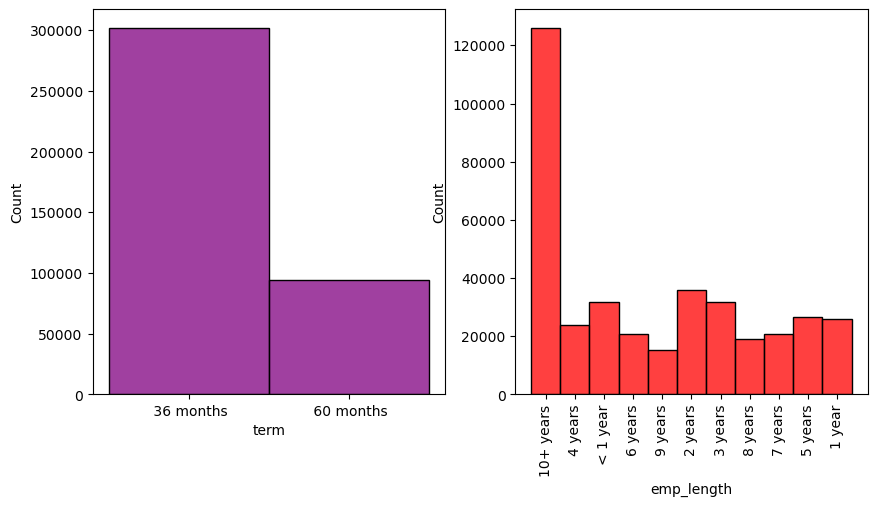

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sn.histplot(df['term'],color='purple')  # Categorical variable
plt.subplot(1,2,2)
sn.histplot(df['emp_length'],color='red')  # Categorical variable
plt.xticks(rotation=90,fontsize=10)
plt.show()

#### Most of the beneficieries have an employment history of more tan 10 years.
#### The terms for loan closure is either 36 months or 60 months.

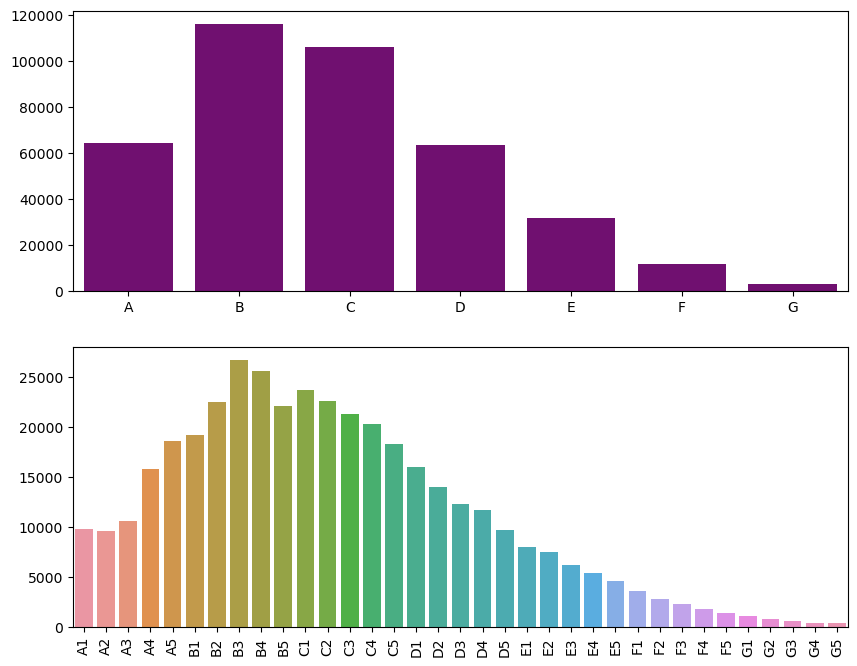

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sn.barplot(x=df['grade'].value_counts().sort_index().index,y=df['grade'].value_counts().sort_values().sort_index().values,color='purple')  # Categorical variable
plt.subplot(2,1,2)
sn.barplot(x=df['sub_grade'].value_counts().sort_index().index,y=df['sub_grade'].value_counts().sort_values().sort_index().values)
plt.xticks(rotation=90,fontsize=10)
plt.show()


#### Grade and Subgrade alloted for the beneficieries are having a right skewed distribution with grade B specifically B3 being frequently allocated.

<Axes: xlabel='verification_status', ylabel='Count'>

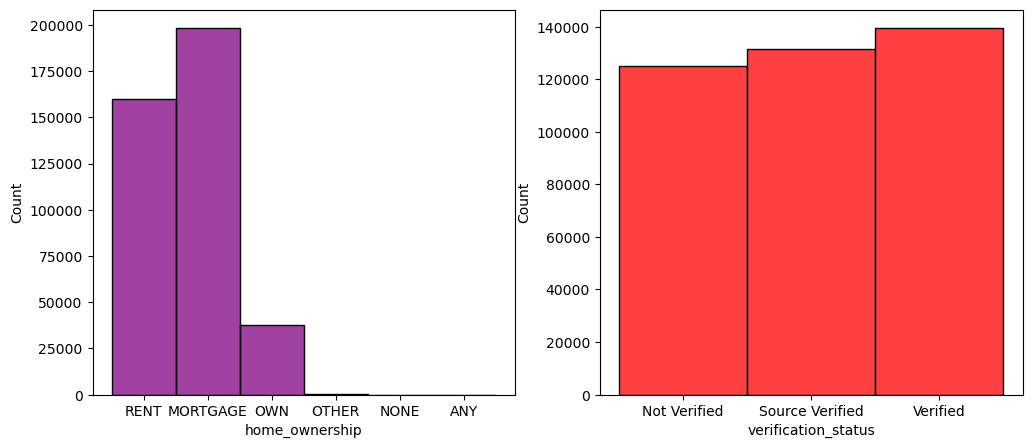

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sn.histplot(df['home_ownership'],color='purple')  # Categorical variable
plt.subplot(1,2,2)
sn.histplot(df['verification_status'],color='red')  # Categorical variable

#### Most home ownership status amoung the customers is as mortgage,then as rent and further as own.There is not much difference in the number of verified ,source verified and not verified employment details of the beneficieries.

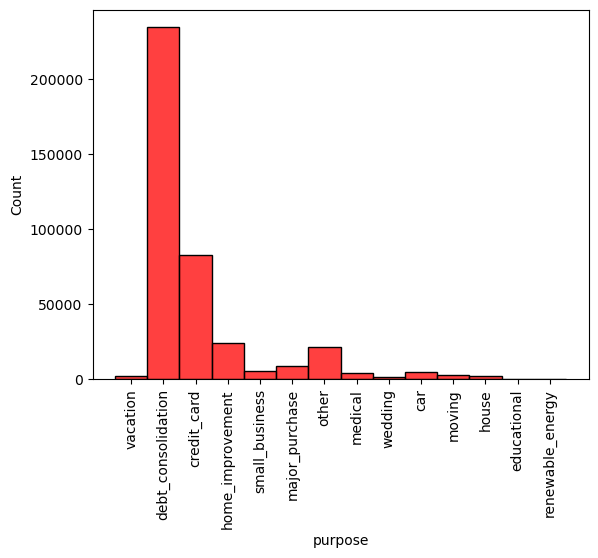

In [24]:
sn.histplot(df['purpose'],color='red')  # Categorical variable
plt.xticks(rotation=90,fontsize=10)
plt.show()

#### The most quoted purpose of taking loan is debt consolidation ,then comes credit card

Text(0.5, 1.0, 'Loan Status Distribution')

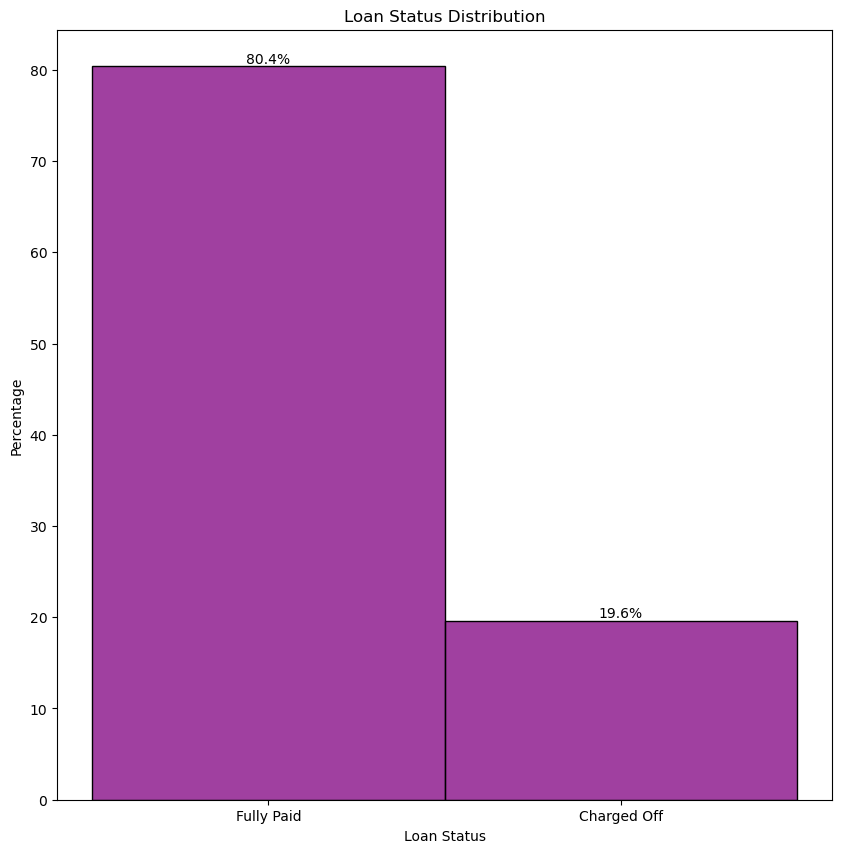

In [25]:
plt.figure(figsize=(10,10))
ax =sn.histplot(df['loan_status'],color='purple', stat='percent')  # Categorical variable
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')



<Axes: xlabel='application_type', ylabel='Count'>

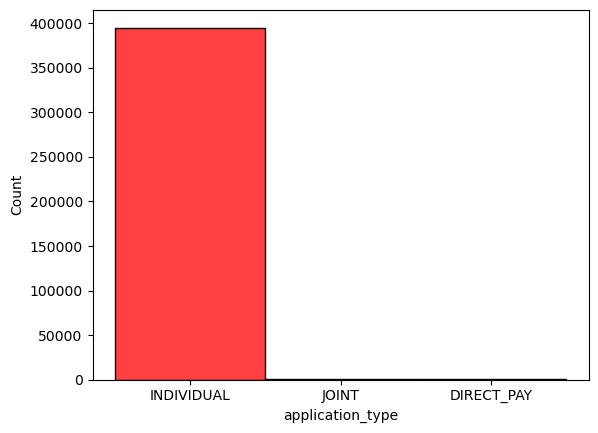

In [26]:
sn.histplot(df['application_type'],color='red')  # Categorical variable

#### loan status distribution is unbalaced with Fuly paid category making almost four times charged off.similarly individual application dominates over joint and direct pay

#### Continous variable

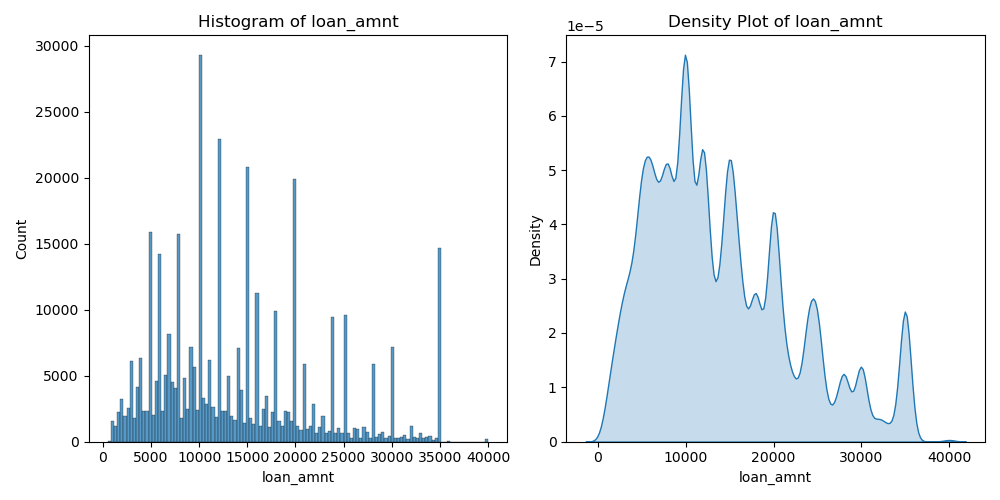

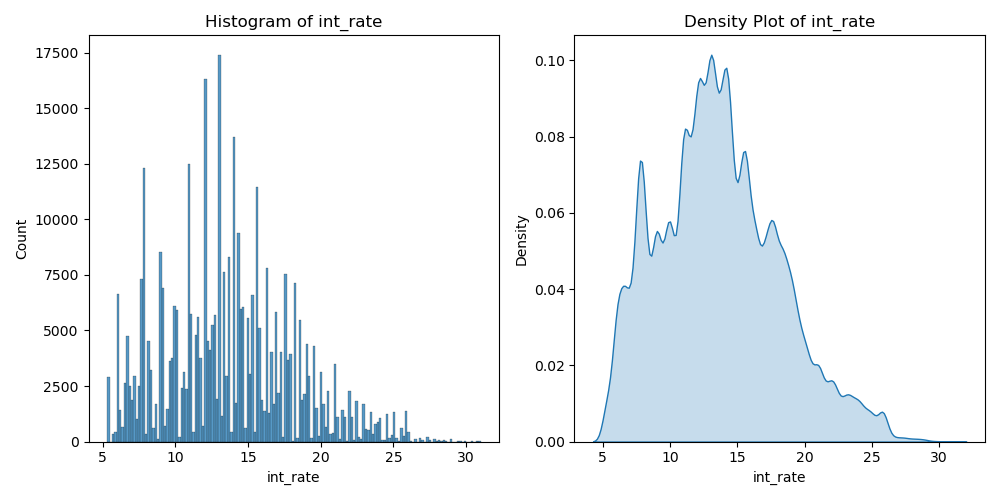

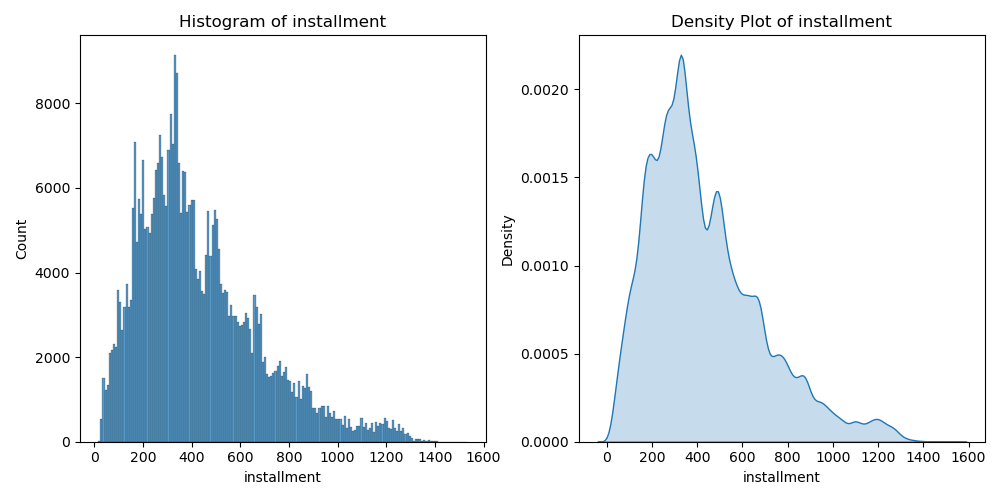

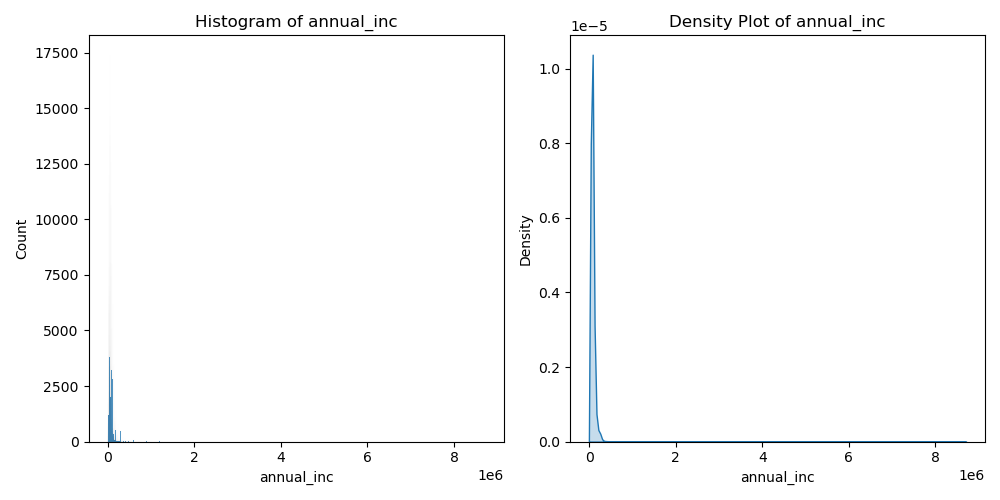

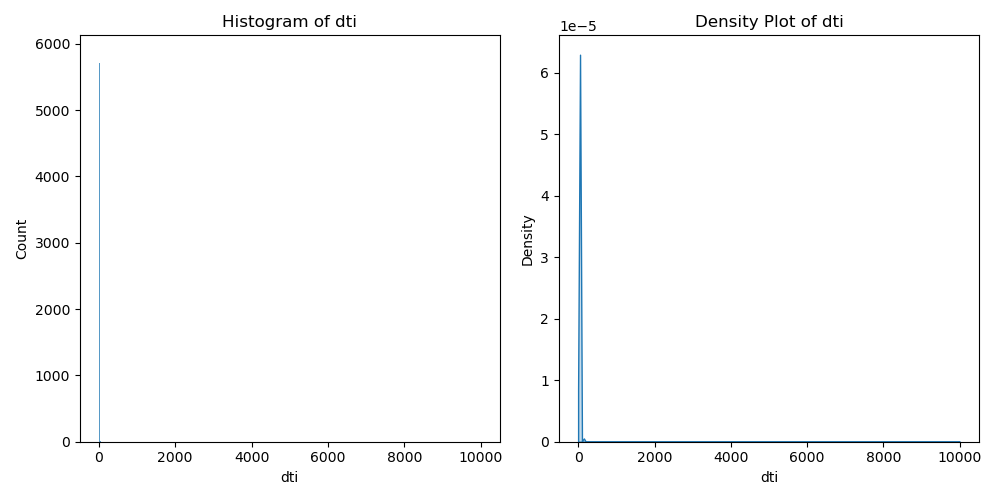

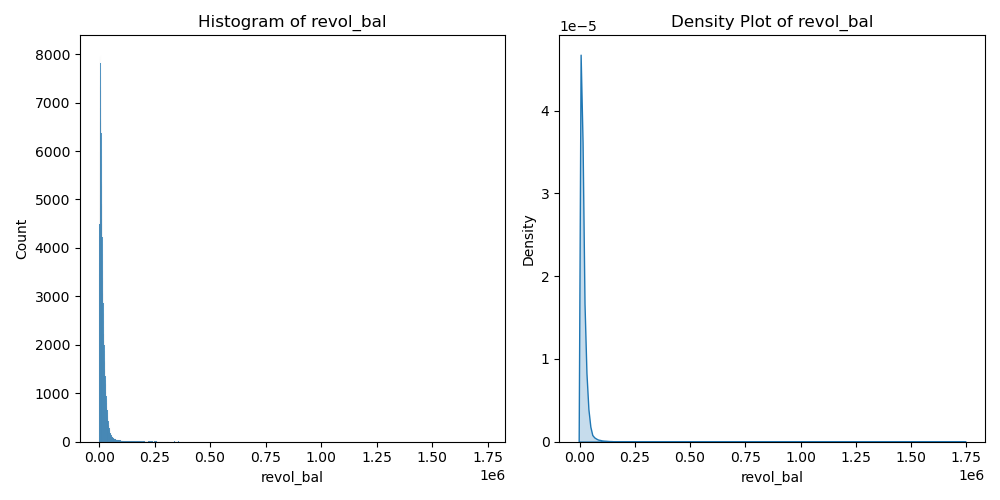

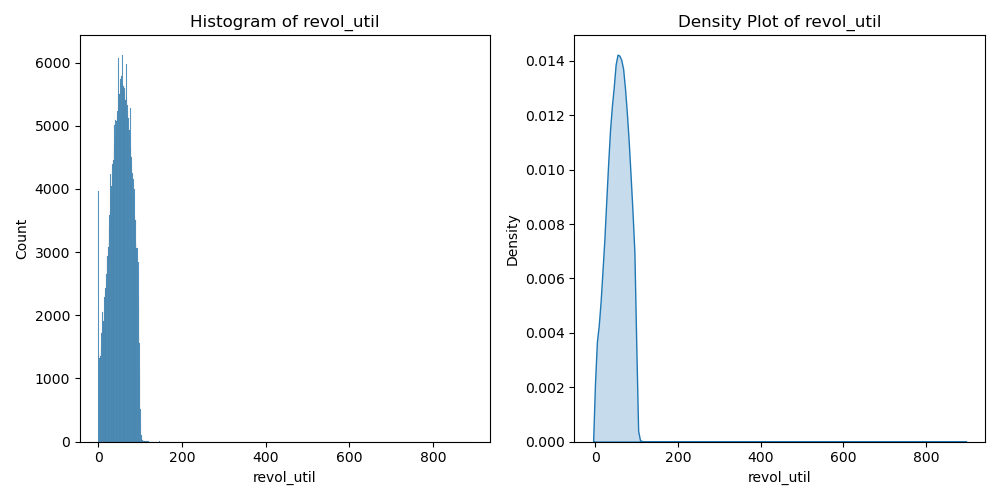

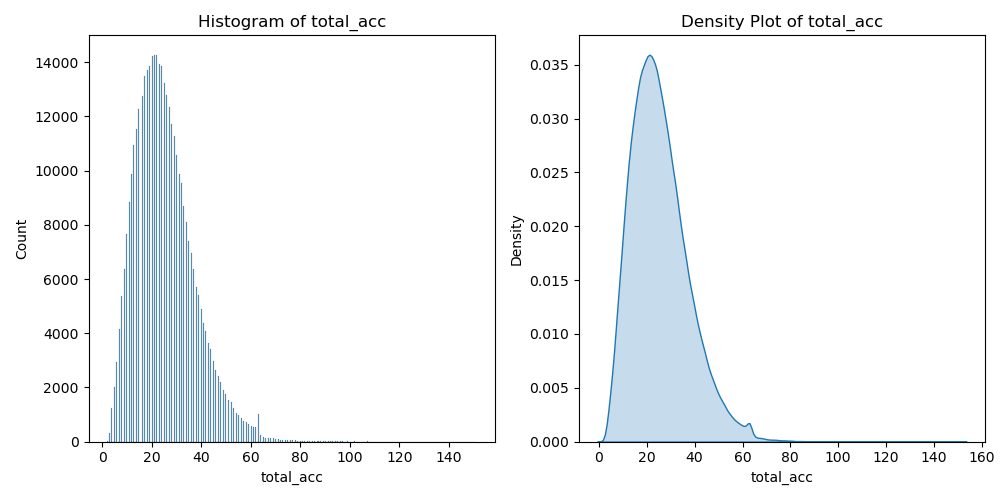

In [27]:

from IPython.display import Image, display


# Continuous variables
continuous_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc']

# Plotting histograms and density plots and saving the figures
for i, var in enumerate(continuous_vars):
    plt.figure(figsize=(10, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sn.histplot(df[var], kde=False)
    plt.title(f'Histogram of {var}')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sn.kdeplot(df[var], shade=True)
    plt.title(f'Density Plot of {var}')
    
    plt.tight_layout()
    filename = f'plot_{i}.png'
    plt.savefig(filename)
    plt.close()

# Display all saved images
for i in range(len(continuous_vars)):
    display(Image(filename=f'plot_{i}.png'))


#### Loan amount,interest rate,installment,annual income are right skewed distribution

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#### loan_amnt, int_rate, installment, annual_inc,total_acc distributions are right skewed

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Outlier Detection

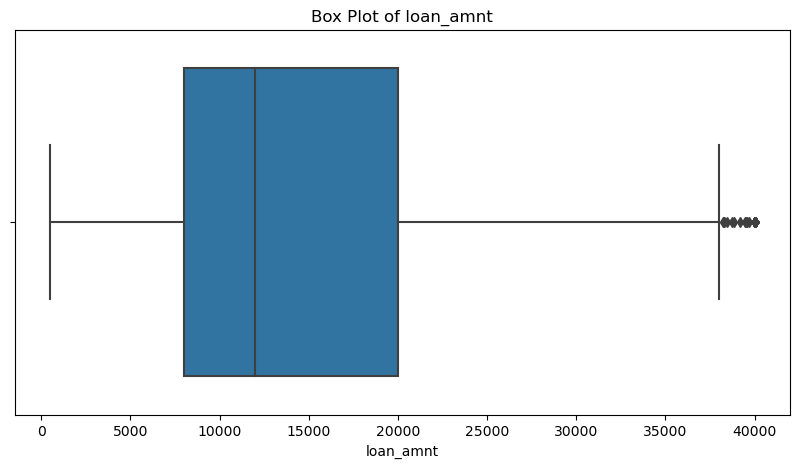

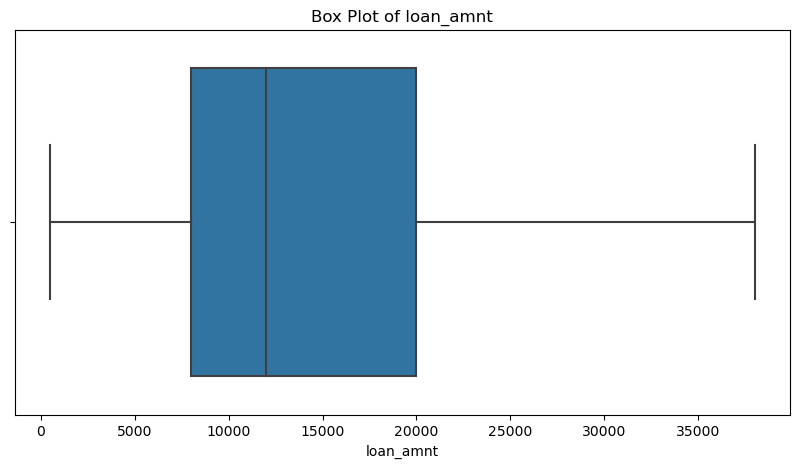

loan_amnt: Number of outliers = 191
loan_amnt: Lower bound = -10000.0, Upper bound = 38000.0


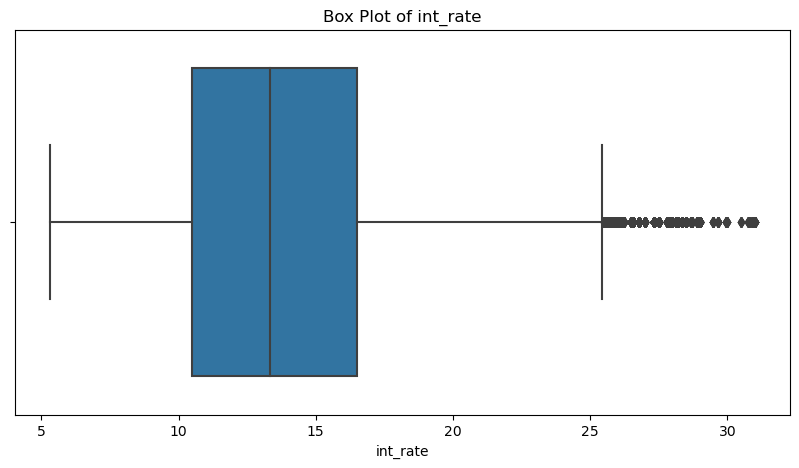

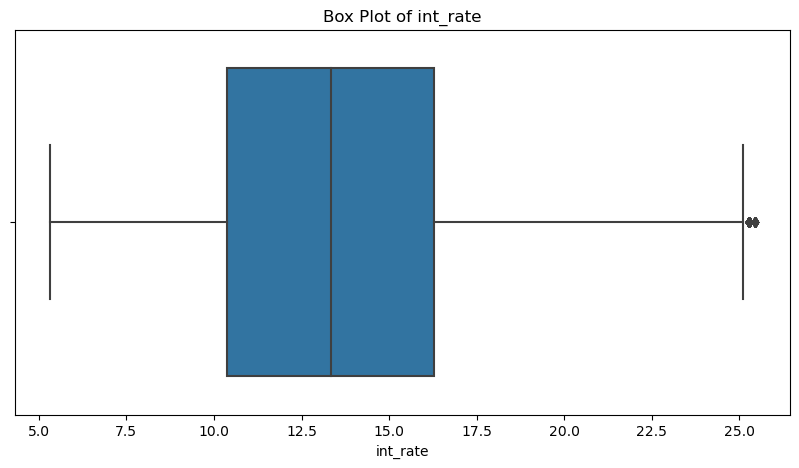

int_rate: Number of outliers = 3777
int_rate: Lower bound = 1.4900000000000038, Upper bound = 25.489999999999995


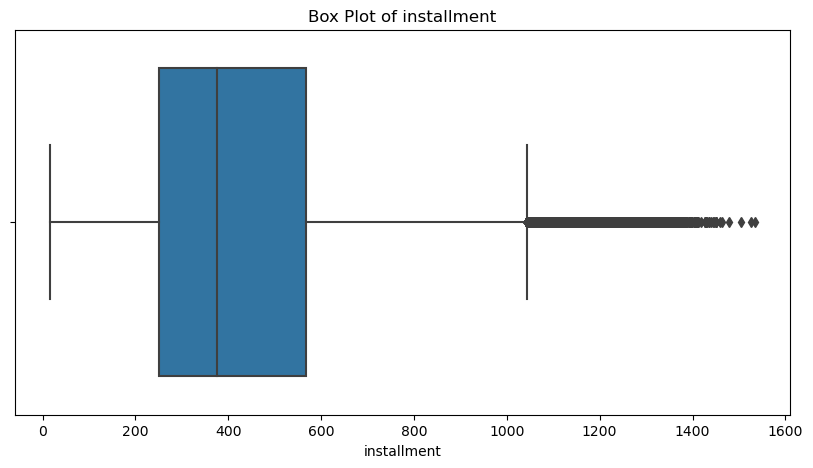

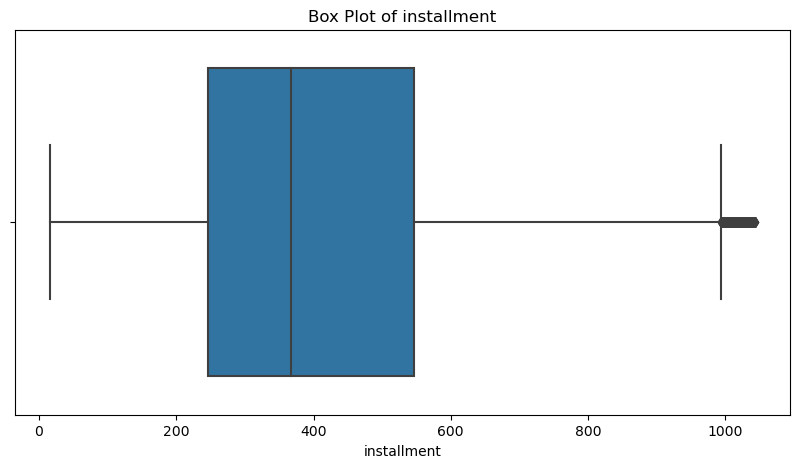

installment: Number of outliers = 11250
installment: Lower bound = -225.12499999999986, Upper bound = 1042.7549999999999


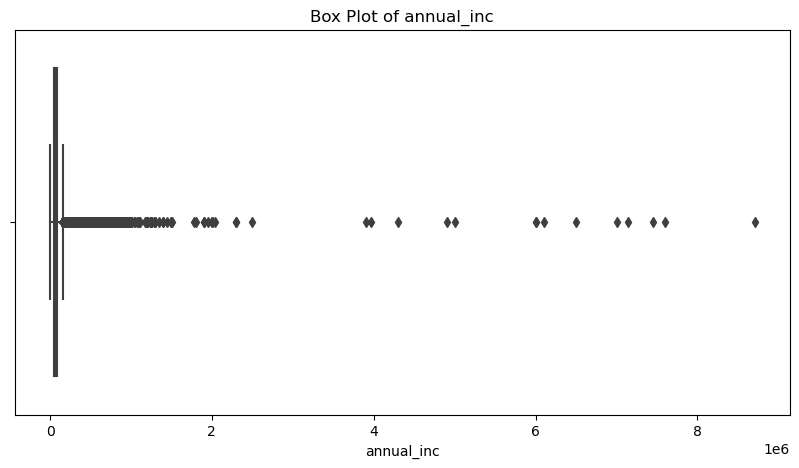

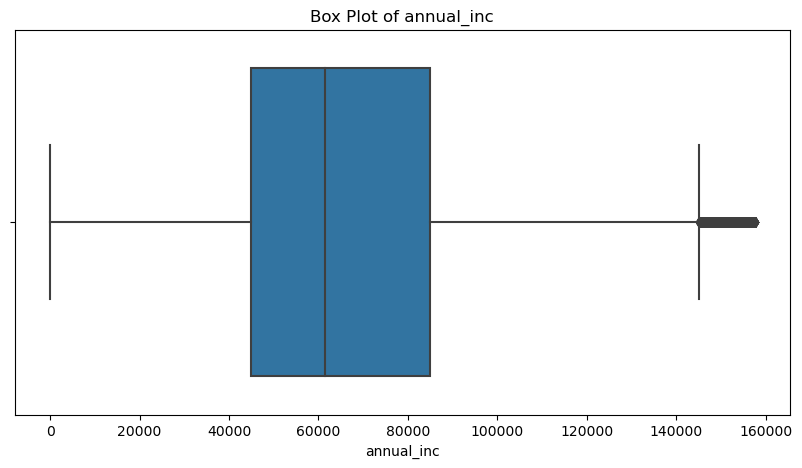

annual_inc: Number of outliers = 16700
annual_inc: Lower bound = -22500.0, Upper bound = 157500.0


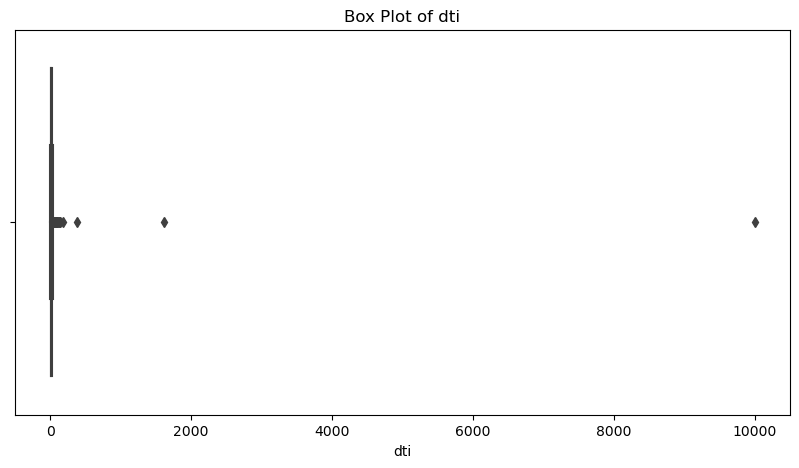

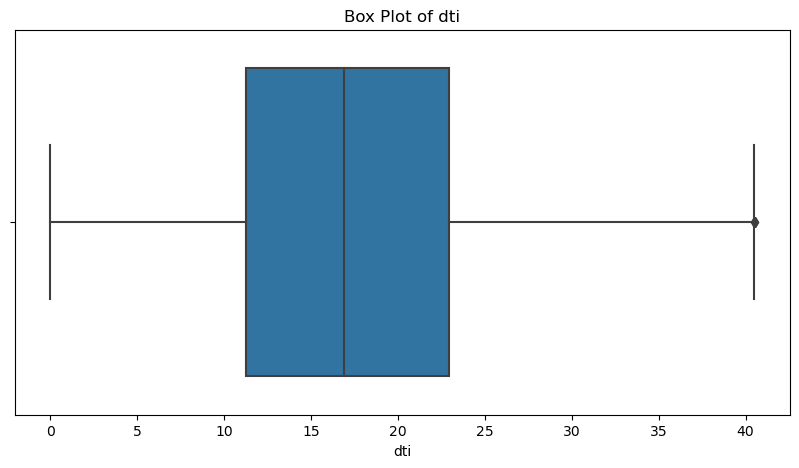

dti: Number of outliers = 275
dti: Lower bound = -6.270000000000001, Upper bound = 40.53


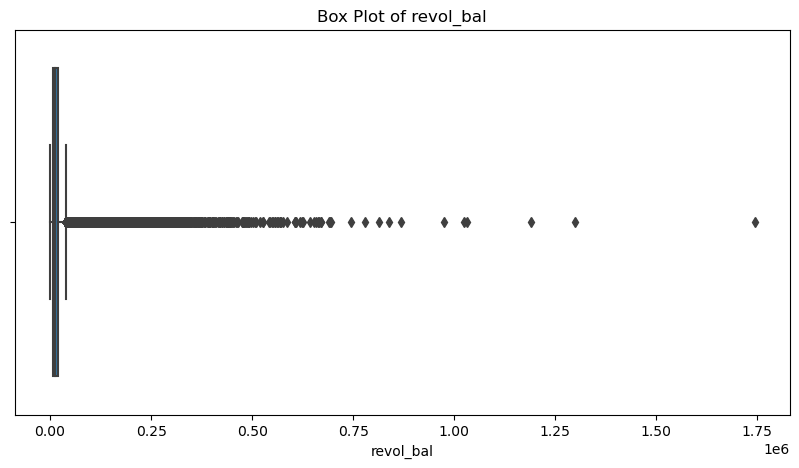

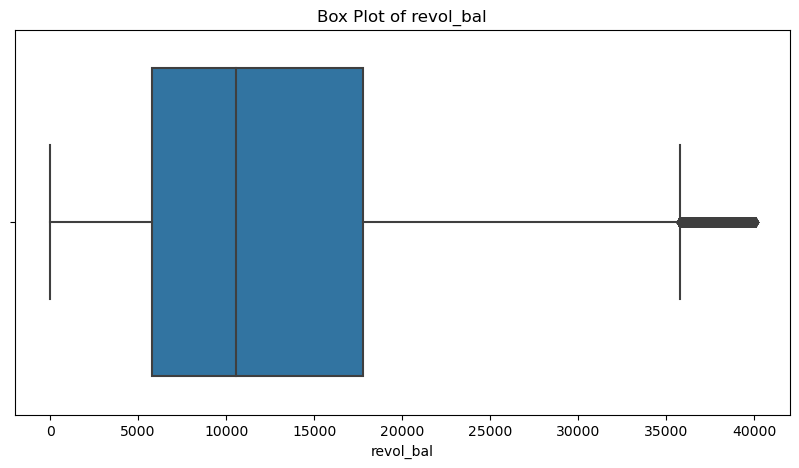

revol_bal: Number of outliers = 21259
revol_bal: Lower bound = -14367.5, Upper bound = 40012.5


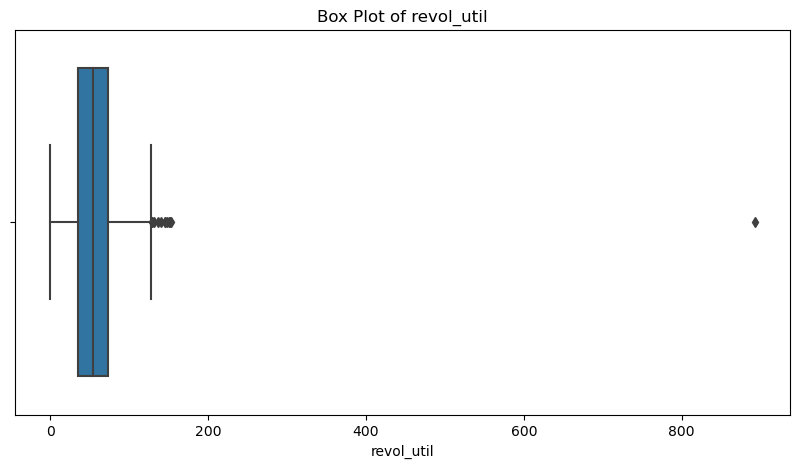

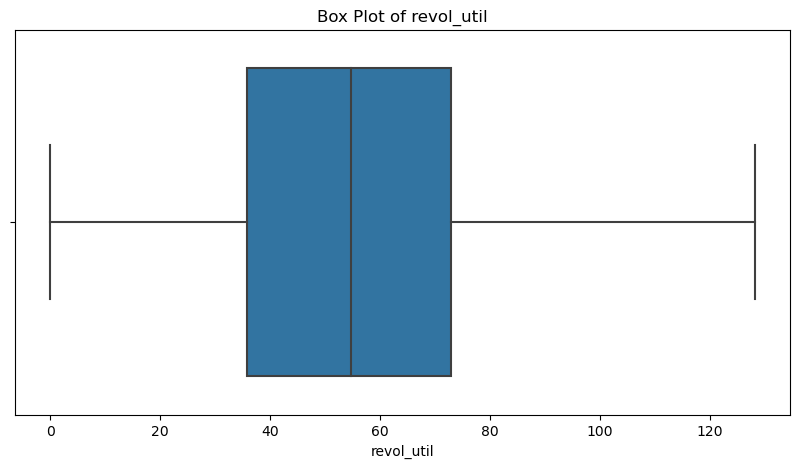

revol_util: Number of outliers = 12
revol_util: Lower bound = -19.850000000000016, Upper bound = 128.55


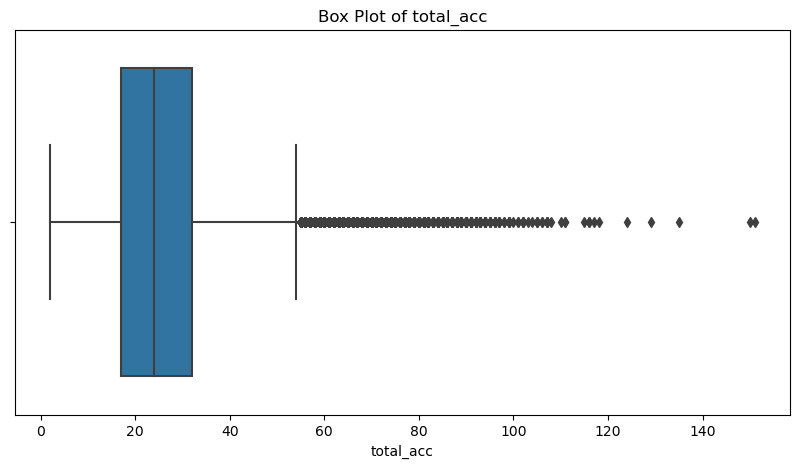

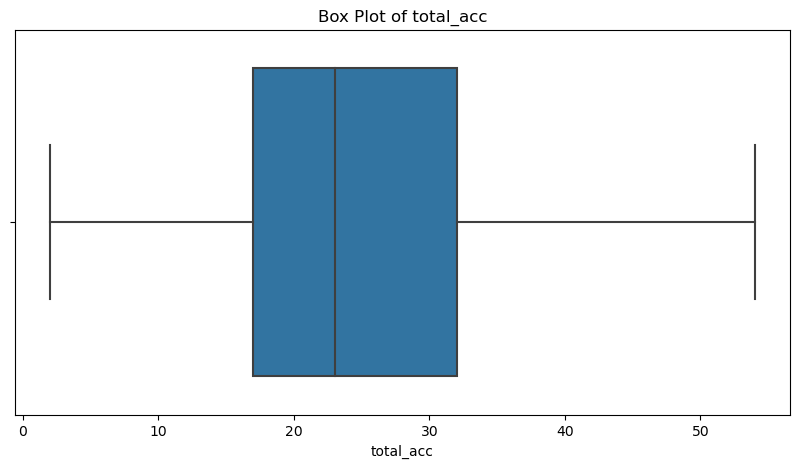

total_acc: Number of outliers = 8499
total_acc: Lower bound = -5.5, Upper bound = 54.5


In [30]:
continuous_vars=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc']

for var in continuous_vars:
    plt.figure(figsize=(10, 5))
    sn.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.show()
    
    # Calculating IQR and detecting outliers
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    
    df_new=df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
    plt.figure(figsize=(10, 5))
    sn.boxplot(x=df_new[var])
    plt.title(f'Box Plot of {var}')
    plt.show()
    
    print(f'{var}: Number of outliers = {len(outliers)}')
    print(f'{var}: Lower bound = {lower_bound}, Upper bound = {upper_bound}')

### Bivariate analysis

In [31]:
df_FULLYPAID=df[df['loan_status']=='Fully Paid']
df_CHARGEDOFF=df[df['loan_status']=='Charged Off']

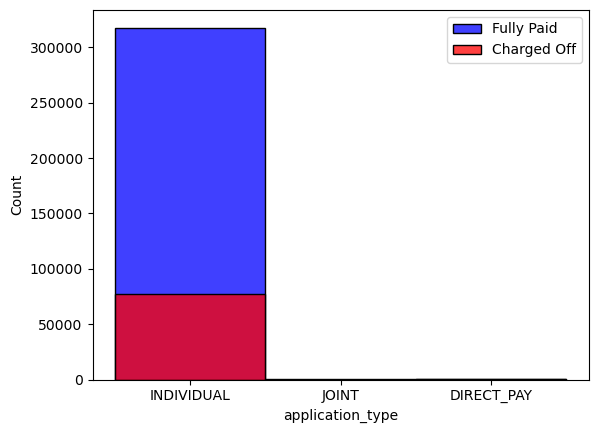

In [32]:
sn.histplot(df_FULLYPAID['application_type'], color='blue',label='Fully Paid',binwidth=.4)

sn.histplot(df_CHARGEDOFF['application_type'], color='red',label='Charged Off',binwidth=.4)
plt.legend()

#### Amoung the indivitual application fully paid beneficieries form 3/4 of the total.

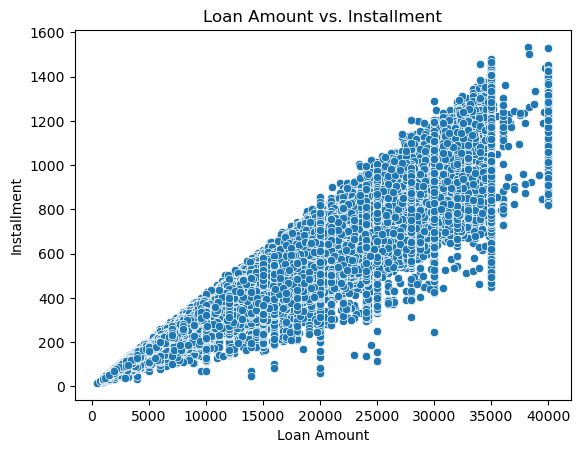

In [33]:
#Loan Amount vs. Installment

sn.scatterplot(x='loan_amnt', y='installment', data=df)
plt.title('Loan Amount vs. Installment')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()

#### This plot helps us understand the relationship between the loan amount and the installment amount. We expect a positive correlation where higher loan amounts result in higher installments.

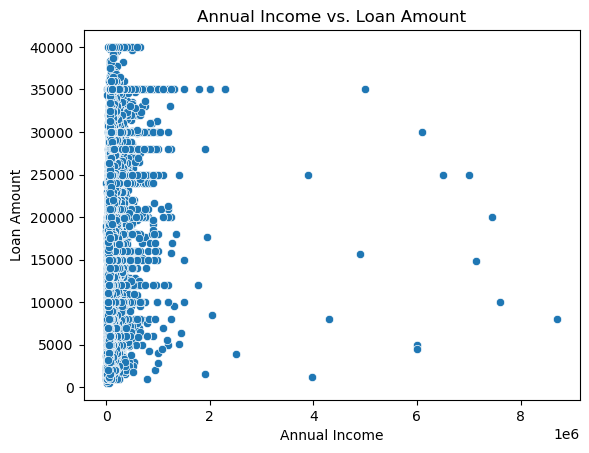

In [34]:
# Annual Income vs. Loan Amount

sn.scatterplot(x='annual_inc', y='loan_amnt', data=df)
plt.title('Annual Income vs. Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

#### There is no Potential  correlation where higher incomes allow for larger loan amounts.

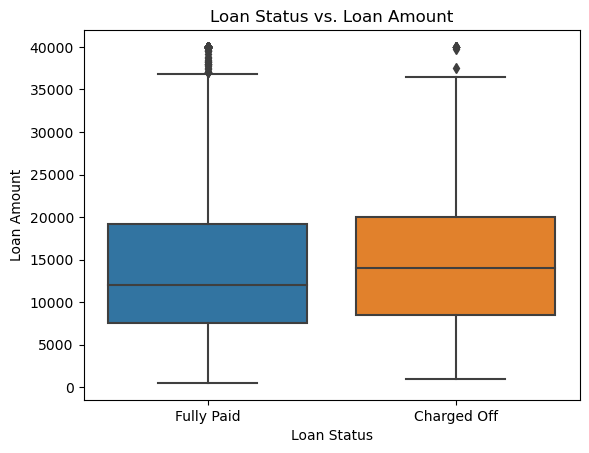

In [35]:
# Loan Status vs. Loan Amount

sn.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Status vs. Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

#### This boxplot helps compare the distribution of loan amounts between different loan statuses (e.g., fully paid, charged off). It shows that there's no significant difference in loan amounts for different loan outcomes.

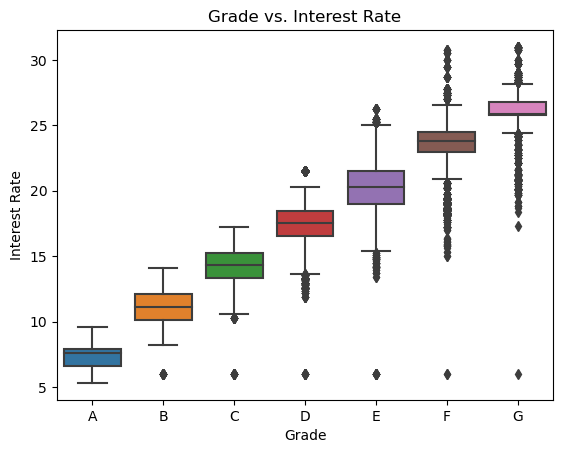

In [36]:
# Grade vs. Interest Rate

sn.boxplot(x='grade', y='int_rate', data=df,order=sorted(df['grade'].unique()))
plt.title('Grade vs. Interest Rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

#### This plot shows the relationship between the loan grade and the interest rate. Higher grades should generally correspond to lower interest rates.

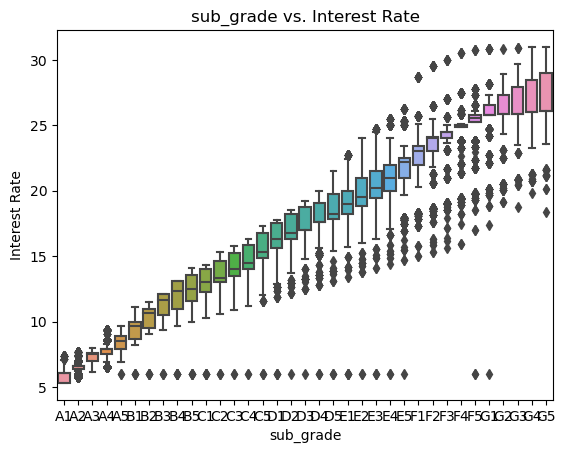

In [37]:
# subGrade vs. Interest Rate

sn.boxplot(x='sub_grade', y='int_rate', data=df,order=sorted(df['sub_grade'].unique()))
plt.title('sub_grade vs. Interest Rate')
plt.xlabel('sub_grade')
plt.ylabel('Interest Rate')
plt.show()

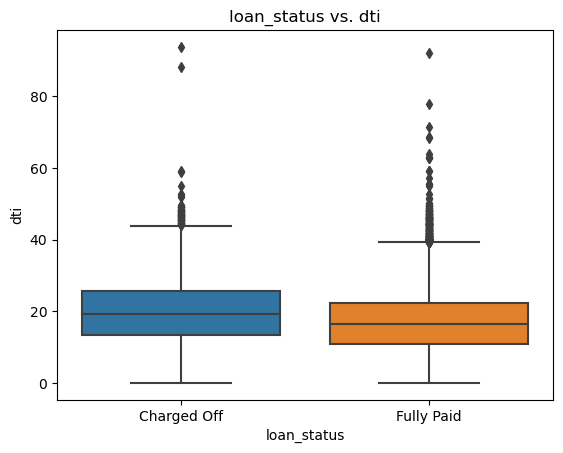

In [38]:
# loan_status vs. dti
df=df[df['dti']<100]
sn.boxplot(x='loan_status', y='dti', data=df,order=sorted(df['loan_status'].unique()))
plt.title('loan_status vs. dti')
plt.xlabel('loan_status')
plt.ylabel('dti')
plt.show()

#### charged off loans is more for beneficieries with higher debt to income ratio

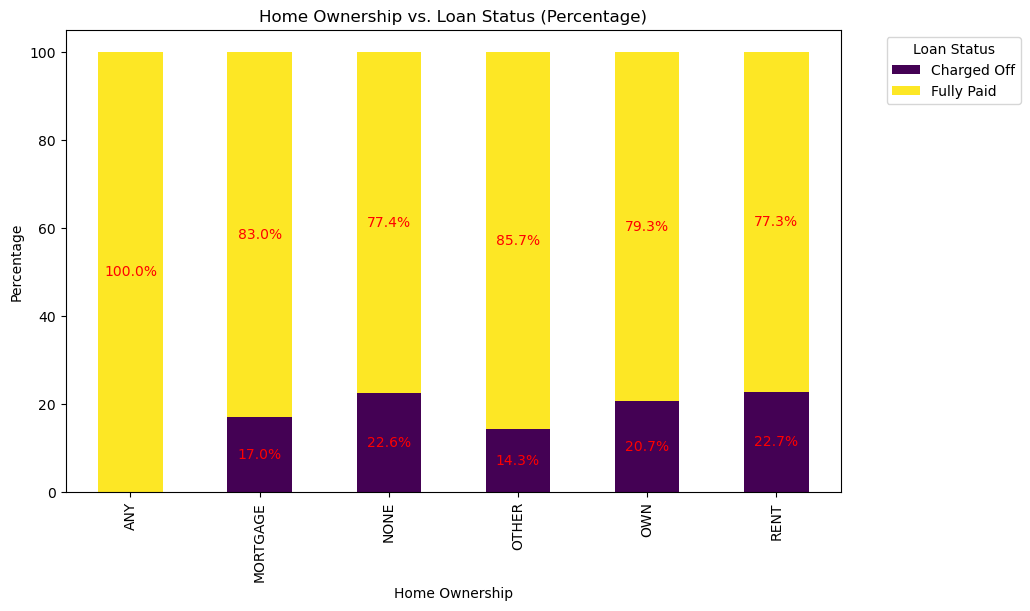

In [39]:
# Home Ownership vs. Loan Status

crosstab = pd.crosstab(df['home_ownership'], df['loan_status'])

# Normalize the crosstab to get the percentages
crosstab_percentage = crosstab.div(crosstab.sum(1), axis=0) * 100

# Plot the stacked bar plot with percentages
ax = crosstab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Annotate each section with percentage contribution
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only annotate if there is height to show
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='red')

# Add titles and labels
plt.title('Home Ownership vs. Loan Status (Percentage)')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Among the beneficieries with mortgage,own or rent home ownerships status, 22.7 % rented ownership beneficieries have their loan charged off whereas this 17% for martgage ownership. 

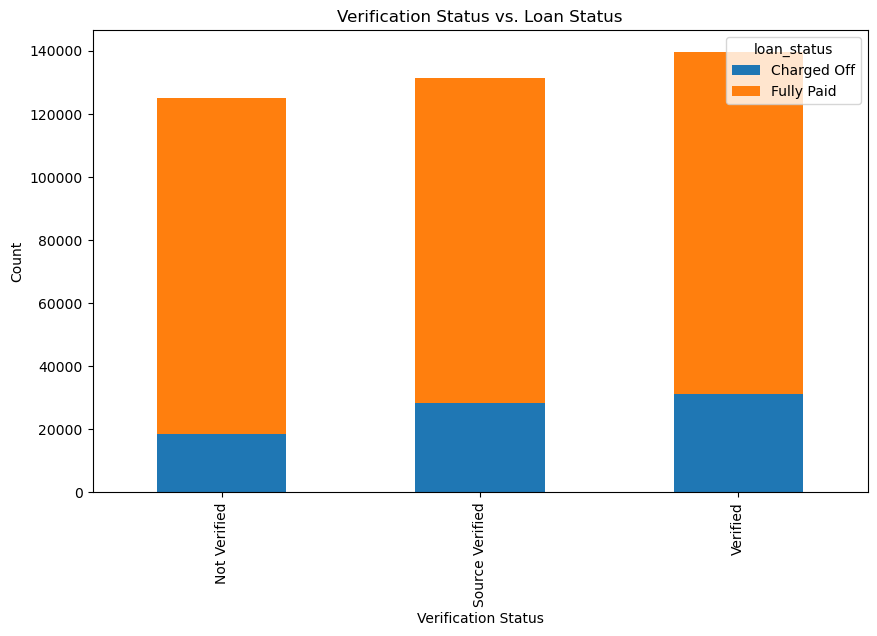

In [40]:
crosstab = pd.crosstab(df['verification_status'], df['loan_status'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Verification Status vs. Loan Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

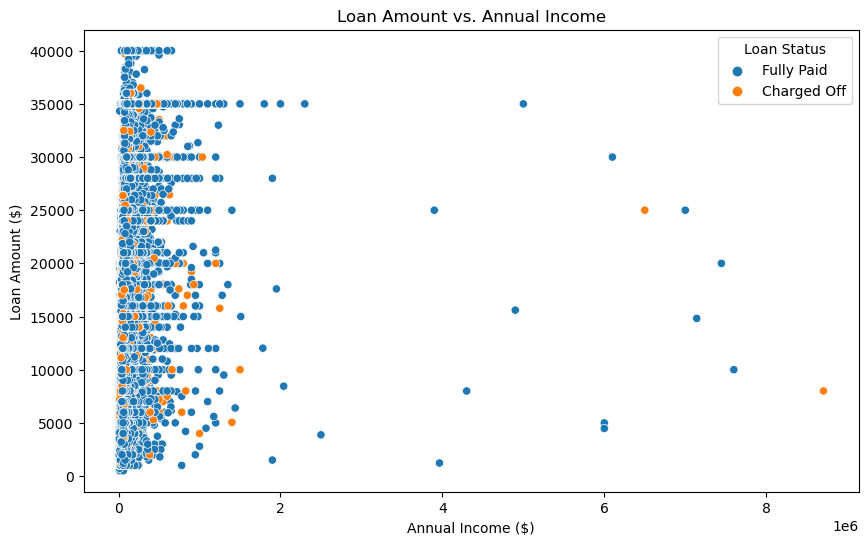

In [41]:
plt.figure(figsize=(10, 6))
sn.scatterplot(x='annual_inc', y='loan_amnt', data=df, hue='loan_status')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.legend(title='Loan Status')
plt.show()


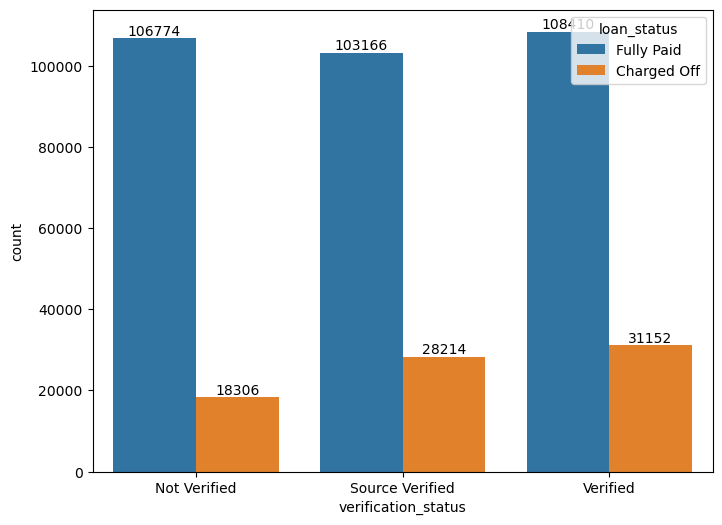

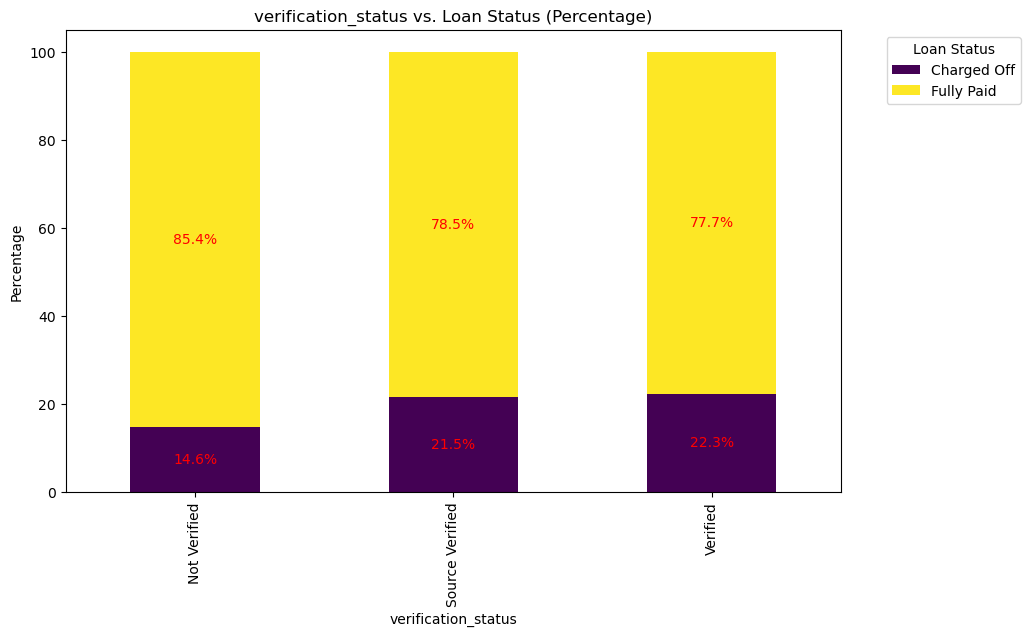

In [42]:
plt.figure(figsize=(8,6))


ax=sn.countplot(x=df['verification_status'],hue=df['loan_status'])
for i in ax.containers:
  ax.bar_label(i,)


crosstab = pd.crosstab(df['verification_status'], df['loan_status'])

# Normalize the crosstab to get the percentages
crosstab_percentage = crosstab.div(crosstab.sum(1), axis=0) * 100

# Plot the stacked bar plot with percentages
ax = crosstab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Annotate each section with percentage contribution
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only annotate if there is height to show
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='red')

# Add titles and labels
plt.title('verification_status vs. Loan Status (Percentage)')
plt.xlabel('verification_status')
plt.ylabel('Percentage')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')


#### Among the employment verification status,charged off percentage for verified employees are more than 20% whereas it is 14% for non verifed employees

<Axes: xlabel='grade', ylabel='count'>

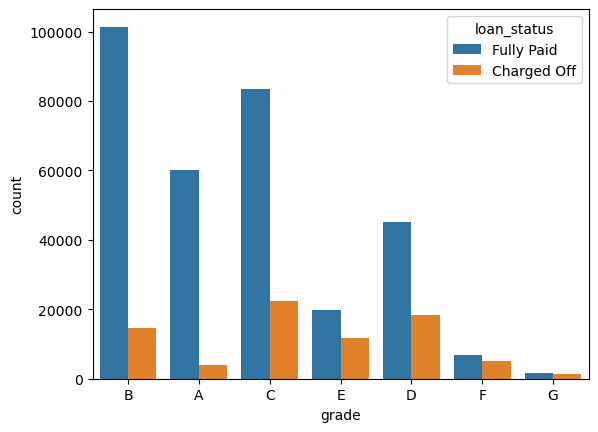

In [43]:
sn.countplot(x=df['grade'],hue=df['loan_status'])

#### People with grades ‘A’ are more likely to fully pay their loan.

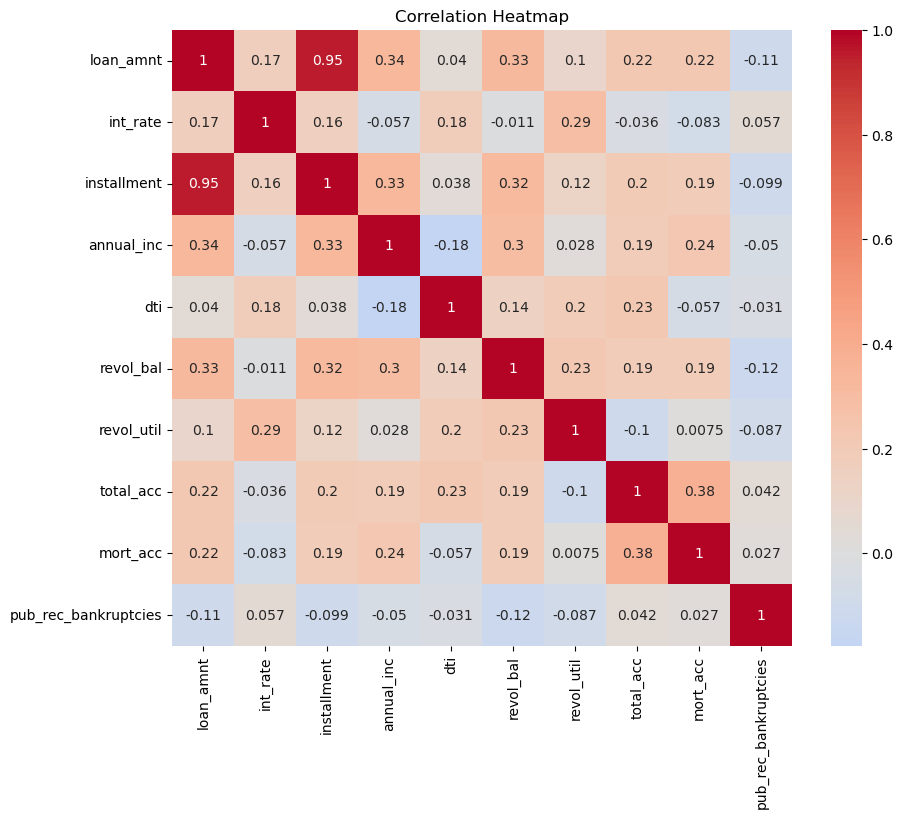

In [44]:
plt.figure(figsize=(10, 8))
sn.heatmap(df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc','mort_acc','pub_rec_bankruptcies']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### Loan amount and installment are highly correlated

### Data Processing

#### Duplicate value check

In [45]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [loan_amnt, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, dti, earliest_cr_line, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, application_type, mort_acc, pub_rec_bankruptcies, address]
Index: []

[0 rows x 27 columns]


#### missing value treatment

In [46]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22922
emp_length              18296
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### Outlier Treatment

In [47]:
def remove_outliers(df, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


In [48]:
# Apply outlier removal to continuous variables

continuous_vars=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc','mort_acc','pub_rec_bankruptcies']
for var in continuous_vars:
    df = remove_outliers(df, var)

#### Feature Engineering

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [50]:
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)

In [51]:
df['term'] = df['term'].str.replace('months', '')
df['emp_length'] = df['emp_length'].str.replace(' years','').str.replace(' year','')

In [52]:
df['term']= df['term'].astype(float)
df.drop(columns=['emp_title','title'], inplace=True)

In [53]:
# Binary flags based on certain conditions

df['has_pub_rec'] = np.where(df['pub_rec'] > 0, 1, 0)
df['has_mort_acc'] = np.where(df['mort_acc'] > 0, 1, 0)
df['has_bankruptcies'] = np.where(df['pub_rec_bankruptcies'] > 0, 1, 0)

In [54]:
# Mapping employment length
emp_length_map = {
    '< 1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5,
    '6': 6, '7': 7, '8': 8, '9': 9, '10+': 10
}
df['emp_length'] = df['emp_length'].replace(emp_length_map)

In [55]:
# Mapping grade
#Encoding Categorical Variables

# Label Encoding for 'grade'
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])

In [56]:

# Mapping sub_grade
sub_grade_map = {
    'A1': 11, 'A2': 12, 'A3': 13, 'A4': 14, 'A5': 15, 'B1': 21, 'B2': 22, 'B3': 23, 'B4': 24, 'B5': 25,
    'C1': 31, 'C2': 32, 'C3': 33, 'C4': 34, 'C5': 35, 'D1': 41, 'D2': 42, 'D3': 43, 'D4': 44, 'D5': 45,
    'E1': 51, 'E2': 52, 'E3': 53, 'E4': 54, 'E5': 55, 'F1': 61, 'F2': 62, 'F3': 63, 'F4': 64, 'F5': 65,
    'G1': 71, 'G2': 72, 'G3': 73, 'G4': 74, 'G5': 75
}
df['sub_grade'] = df['sub_grade'].replace(sub_grade_map)

In [57]:
# Mapping application_type
application_type_map = {
    'INDIVIDUAL': 1, 'JOINT': 2, 'DIRECT_PAY': 3
}
df['application_type'] = df['application_type'].replace(application_type_map)

In [58]:
# Mapping home_ownership

home_ownership_map = {
    'OWN': 1, 'OTHER': 2, 'NONE': 3, 'MORTGAGE': 4, 'ANY': 5,
    'RENT': 6
}
df['home_ownership'] = df['home_ownership'].replace(home_ownership_map)


In [59]:
purpose_map = {
    'debt_consolidation': 1, 'credit_card': 2, 'home_improvement': 3, 'other': 4, 'major_purchase': 5,
    'medical': 6, 'car': 7, 'small_business': 8, 'moving': 9, 'vacation': 10, 'house': 11,
    'wedding': 12, 'renewable_energy': 13
}

df['purpose'] = df['purpose'].replace(purpose_map)

In [60]:
# Mapping verification_status

verification_status_map = {
    'Not Verified': 1, 'Source Verified': 2, 'Verified': 3
}
df['verification_status'] = df['verification_status'].replace(verification_status_map)


In [61]:
initial_list_status_map={
    'w': 1, 'f': 2
}
df['initial_list_status']=df['initial_list_status'].replace(initial_list_status_map)

In [62]:
# Encode the target variable
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)


In [63]:
# Extracting month and year from 'issue_d'
df['issue_month'] = pd.to_datetime(df['issue_d']).dt.month
df['issue_year'] = pd.to_datetime(df['issue_d']).dt.year

df['earliest_cr_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year

df.drop(columns=['issue_d','earliest_cr_line'], inplace=True)
df['years_as_cust']=df['issue_year']-df['earliest_cr_year']

In [64]:
# Function to extract the second-to-last component
def extract_country_code(address):
    parts = address.split(' ')
    if len(parts) > 1:
        return parts[-2]  # Get the second-to-last component
    return None  # Return None if there's not enough parts

# Apply the function to the address column
df['country_code'] = df['address'].apply(extract_country_code)
df.drop(columns='address', inplace=True)

In [65]:
df['country_code'].unique()

array(['OK', 'SD', 'WV', 'MA', 'VA', 'DE', 'TX', 'AE', 'AP', 'MS', 'NH',
       'HI', 'PA', 'CO', 'FL', 'WI', 'NC', 'IN', 'MO', 'AA', 'TN', 'KS',
       'WY', 'NE', 'RI', 'AR', 'MI', 'IL', 'LA', 'AZ', 'NY', 'ND', 'IA',
       'UT', 'MD', 'MN', 'OH', 'MT', 'NJ', 'NV', 'NM', 'OR', 'AL', 'VT',
       'DC', 'ID', 'GA', 'CT', 'AK', 'KY', 'ME', 'WA', 'CA', 'SC'],
      dtype=object)

In [66]:
country_code_map={'OK':1, 'SD':2, 'WV':3, 'MA':4, 'VA':5, 'DE':6, 'TX':7, 'AE':8, 'AP':9, 'MS':10, 'NH':11,
       'HI':12, 'PA':13, 'CO':14, 'FL':15, 'WI':16, 'NC':17, 'IN':18, 'MO':19, 'AA':20, 'TN':21, 'KS':22,
       'WY':23, 'NE':24, 'RI':25, 'AR':26, 'MI':27, 'IL':28, 'LA':29, 'AZ':30, 'NY':31, 'ND':32, 'IA':33,
       'UT':34, 'MD':35, 'MN':36, 'OH':37, 'MT':38, 'NJ':39, 'NV':40, 'NM':41, 'OR':41, 'AL':42, 'VT':43,
       'DC':44, 'ID':45, 'GA':46, 'CT':47, 'AK':48, 'KY':49, 'ME':50, 'WA':51, 'CA':52, 'SC':53}

df['country_code'] = df['country_code'].replace(country_code_map)


In [67]:
# 1. Feature Scaling
scaler = StandardScaler()
df[['loan_amnt', 'int_rate', 'annual_inc','installment','revol_bal']] = scaler.fit_transform(df[['loan_amnt', 'int_rate', 'annual_inc','installment','revol_bal']])


In [68]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,mort_acc,pub_rec_bankruptcies,has_pub_rec,has_mort_acc,has_bankruptcies,issue_month,issue_year,earliest_cr_year,years_as_cust,country_code
0,-0.448050,36.0,-0.501306,-0.366586,1,24,10,6,1.868863,1,...,0.0,0.0,0,0,0,1,2015,1990,25,1
1,-0.720244,36.0,-0.374879,-0.670987,1,25,4,4,0.006770,1,...,3.0,0.0,0,1,0,1,2015,2004,11,2
2,0.314092,36.0,-0.719681,0.480248,1,23,0,6,-0.778998,2,...,0.0,0.0,0,0,0,1,2015,2007,8,3
3,-0.829121,36.0,-1.639154,-0.885833,0,12,6,6,-0.387135,1,...,0.0,0.0,0,0,0,11,2014,2006,8,4
4,1.508340,60.0,0.838826,0.968624,2,35,9,4,-0.351325,3,...,1.0,0.0,0,1,0,4,2013,1999,14,5


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262585 entries, 0 to 396028
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             262585 non-null  float64
 1   term                  262585 non-null  float64
 2   int_rate              262585 non-null  float64
 3   installment           262585 non-null  float64
 4   grade                 262585 non-null  int32  
 5   sub_grade             262585 non-null  int64  
 6   emp_length            262585 non-null  int64  
 7   home_ownership        262585 non-null  int64  
 8   annual_inc            262585 non-null  float64
 9   verification_status   262585 non-null  int64  
 10  loan_status           262585 non-null  int64  
 11  purpose               262585 non-null  int64  
 12  dti                   262585 non-null  float64
 13  open_acc              262585 non-null  float64
 14  pub_rec               262585 non-null  float64
 15  

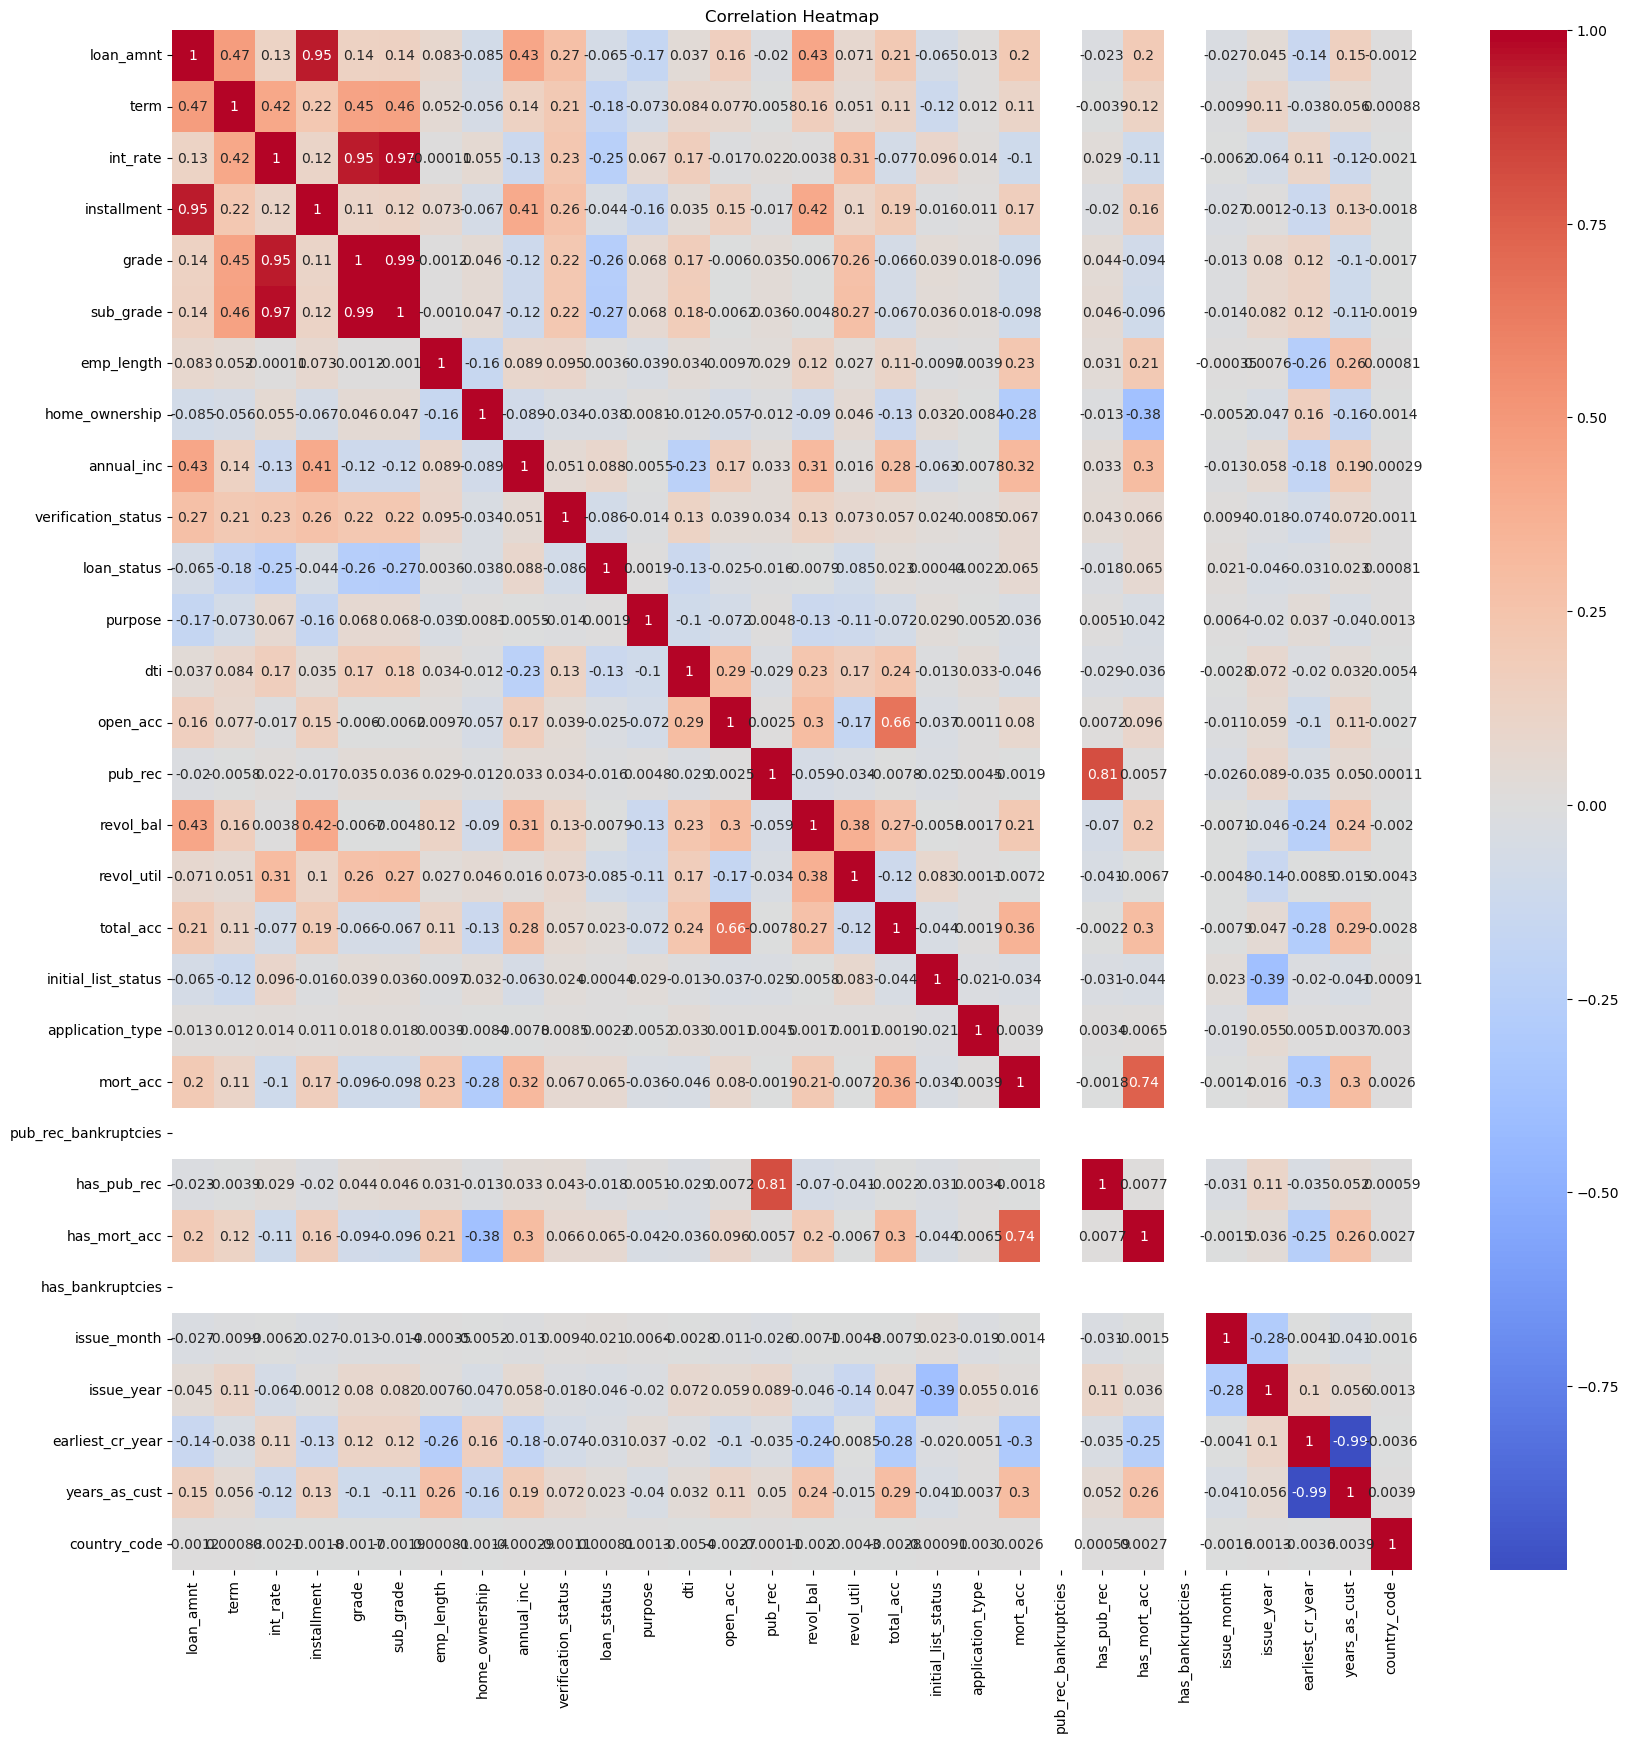

In [70]:
plt.figure(figsize=(20, 20))
sn.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### initial_list_status and country_code have least correlation to loan status 

In [71]:
df.drop(columns=['sub_grade','installment','issue_year','earliest_cr_year','pub_rec','mort_acc','pub_rec_bankruptcies'], inplace=True)


In [72]:
df.drop(columns=['initial_list_status','country_code'], inplace=True)

In [73]:

# VIF Calculation
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#num_cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'emp_length', 'revol_bal','home_ownership','application_type','sub_grade','grade', 'revol_util', 'total_acc','has_pub_rec','has_mort_acc','has_bankruptcies','issue_month','issue_year']
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Round VIF values to 2 decimal places and sort by VIF
vif_data['VIF'] = vif_data['VIF'].round(2)
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


                Feature    VIF
15     application_type  97.95
3                 grade  32.94
1                  term  28.76
14            total_acc  13.75
11             open_acc  13.47
5        home_ownership  11.81
2              int_rate  11.08
13           revol_util   9.60
10                  dti   8.28
7   verification_status   7.89
20        years_as_cust   7.03
8           loan_status   5.36
19          issue_month   4.80
4            emp_length   4.18
17         has_mort_acc   3.18
9               purpose   2.30
0             loan_amnt   1.87
12            revol_bal   1.86
6            annual_inc   1.61
16          has_pub_rec   1.07
18     has_bankruptcies    NaN


In [74]:
# Filter out features with high VIF
filtered_features = vif_data[vif_data["VIF"] <= 10]["Feature"].tolist()
filtered_features 

['revol_util',
 'dti',
 'verification_status',
 'years_as_cust',
 'loan_status',
 'issue_month',
 'emp_length',
 'has_mort_acc',
 'purpose',
 'loan_amnt',
 'revol_bal',
 'annual_inc',
 'has_pub_rec']

### Model building



In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [76]:
# Separate features and target
X = df[filtered_features].drop(columns=['loan_status'])
y = df['loan_status']


In [78]:
# Split the data into training and testing sets
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(157551, 12)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262585 entries, 0 to 396028
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            262585 non-null  float64
 1   term                 262585 non-null  float64
 2   int_rate             262585 non-null  float64
 3   grade                262585 non-null  int32  
 4   emp_length           262585 non-null  int64  
 5   home_ownership       262585 non-null  int64  
 6   annual_inc           262585 non-null  float64
 7   verification_status  262585 non-null  int64  
 8   loan_status          262585 non-null  int64  
 9   purpose              262585 non-null  int64  
 10  dti                  262585 non-null  float64
 11  open_acc             262585 non-null  float64
 12  revol_bal            262585 non-null  float64
 13  revol_util           262585 non-null  float64
 14  total_acc            262585 non-null  float64
 15  application_type 

In [80]:
# Define the model

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [81]:
model.coef_

array([[-0.00861878, -0.02983682, -0.09126849,  0.00476772,  0.00840589,
        -0.01467996,  0.62993784, -0.03276406, -0.42252203,  0.19095576,
         0.19170482, -0.29696925]])

In [82]:
model.intercept_

array([2.32881577])

In [83]:
model.predict(X_train)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [84]:
model.score(X_train,y_train)

0.7971704400479844

In [85]:
model.score(X_val,y_val)

0.7967134451701354

In [86]:
model.score(X_test,y_test)

0.7984081345088258

In [87]:
y_pred=model.predict(X_test)

In [88]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[  136, 10437],
       [  150, 41794]], dtype=int64)

In [90]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8001761406061534

In [91]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9964238031661262

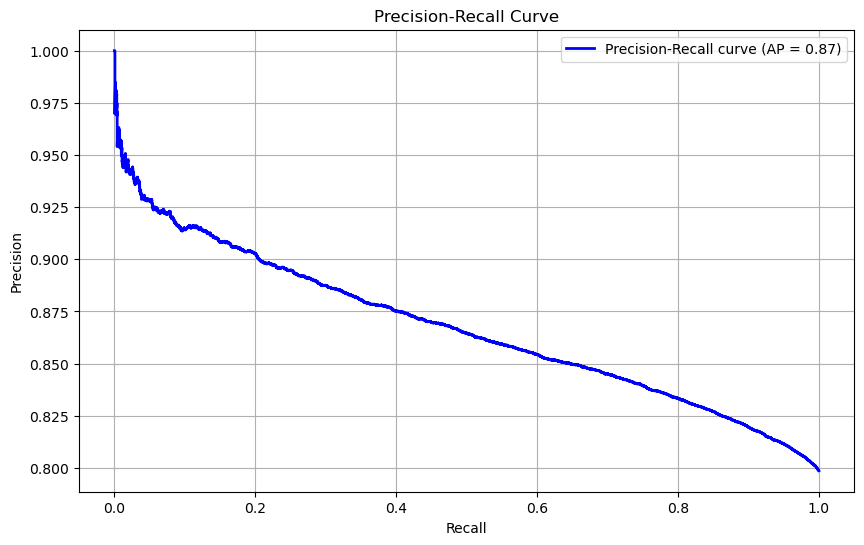

In [92]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### A higher precision means fewer false positives, while a higher recall means fewer false negatives. Depending on the business requirement (e.g., minimizing false positives), one can adjust the decision threshold to achieve a desirable balance between precision and recall.

#### In financial lending, reducing false positives (approving non-defaulters) is often prioritized to avoid financial loss. 


In [93]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [94]:
# Plot the ROC AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

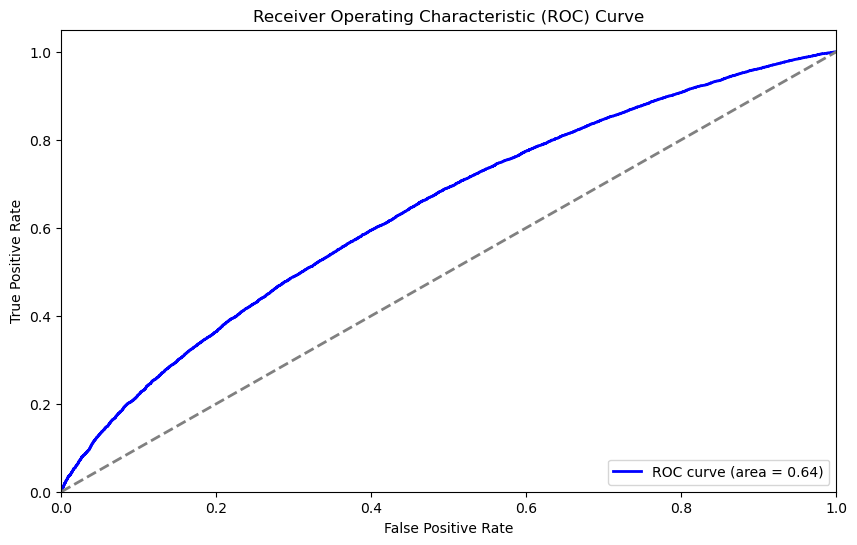

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### The AUC value ranges between 0 and 1. A model with an AUC closer to 1 indicates better performance in distinguishing between defaulters and non-defaulters. An AUC of 0.5 suggests no discriminative power.

#### High AUC indicates that the model has a good measure of separability between classes. A high AUC means the model is capable of distinguishing between positive and negative classes effectively.

#### Here the area under the curve value is 0.64 indicating the model can discriminate,but it is far from an ideal model.

In [96]:
from sklearn.metrics import fbeta_score

beta = 0.5  # More weight on precision
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print(f'F-beta Score: {f_beta}')

F-beta Score: 0.8329878661288007


In [97]:
# Generate classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.01      0.03     10573
           1       0.80      1.00      0.89     41944

    accuracy                           0.80     52517
   macro avg       0.64      0.50      0.46     52517
weighted avg       0.73      0.80      0.71     52517



#### Increasing the decision threshold to prioritize precision will reduce false positives, ensuring that the model only predicts defaulters when it is more certain.

In [98]:
# Adjust the threshold for predictions
optimal_threshold = 0.6  # Example value
y_pred_adjusted = (y_pred_prob >= optimal_threshold).astype(int)

# Re-evaluate the model
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
report_adjusted = classification_report(y_test, y_pred_adjusted)
print("Adjusted Confusion Matrix:")
print(cm_adjusted)
print("Adjusted Classification Report:")
print(report_adjusted)

Adjusted Confusion Matrix:
[[  868  9705]
 [ 1258 40686]]
Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.08      0.14     10573
           1       0.81      0.97      0.88     41944

    accuracy                           0.79     52517
   macro avg       0.61      0.53      0.51     52517
weighted avg       0.73      0.79      0.73     52517

